In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style='ticks', font_scale=1.75)

# Get current working directory and list files
cwd = os.getcwd()
files = os.listdir(cwd)
print(f"Files in {cwd}: {files}")

# Correct file path for Windows
fname = r'C:\Users\dbryant\Data\InputDataMigliavacca2021.csv'  # Use raw string for file path
if os.path.exists(fname):
    df = pd.read_csv(fname)
    print("File loaded successfully:")
    print(df.head())
else:
    print(f"File not found: {fname}")


Files in C:\Users\dbryant\Programs\Geostatistics: [' LAS files, extract the relevant data.ipynb', '.ipynb_checkpoints', '1Probabilities_Lab_completed.ipynb', '2HypothesisTesting_Lab_completed.ipynb', '3LinearRegression_Lab_completed.ipynb', '4LinearClassification_Lab_completed.ipynb', '5Bootstrapping_Lab_completed.ipynb', '6ModelSelection_with_extra_examples.ipynb', '7PCA_Lab_completed.ipynb', '8Clustering_RandomForest_completed.ipynb', 'Assignment 3.ipynb', 'DataFrame_Probabilities_half_completed.ipynb', 'Geostats Assignment 2.ipynb', 'HW1_code_2024.ipynb', 'Python101_completed.ipynb']
File loaded successfully:
  SITE_ID  PFT KoeppenGeiger  latitude  longitude   dataset  TZ  nyears  \
0  AR-Vir  ENF           Cfa  -28.2395   -56.1886  Berkeley  -4       4   
1  AT-Neu  GRA           Dfc   47.1167    11.3175  Berkeley   1      11   
2  AU-Ade  SAV            Aw  -13.0769   131.1178  Berkeley   8       3   
3  AU-ASM  ENF           BSh  -22.2830   133.2490  Berkeley   8       5   
4  AU

Text(0, 0.5, 'NEPmax')

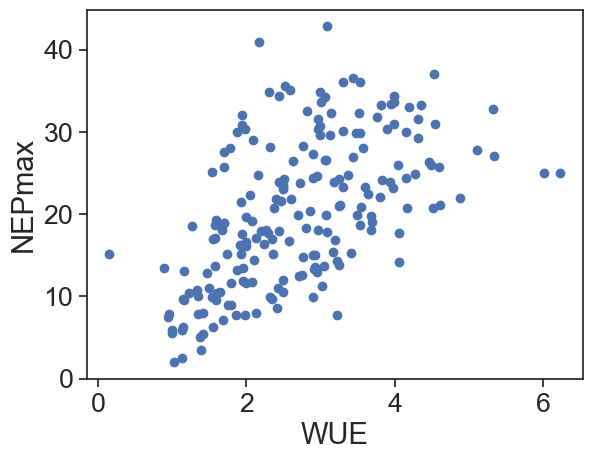

In [2]:
# Excerise 1: K-means clustering, using two features WUE and NEPmax to classify the data points into k groups
from sklearn.cluster import KMeans

# step 1: make a scatter plot, the x axis is WUE, the y axis is NEPmax
plt.figure()
plt.scatter(df['WUE'],df['NEPmax'])
plt.xlabel('WUE')
plt.ylabel('NEPmax')

(202, 2)


Text(0, 0.5, 'NEPmax')

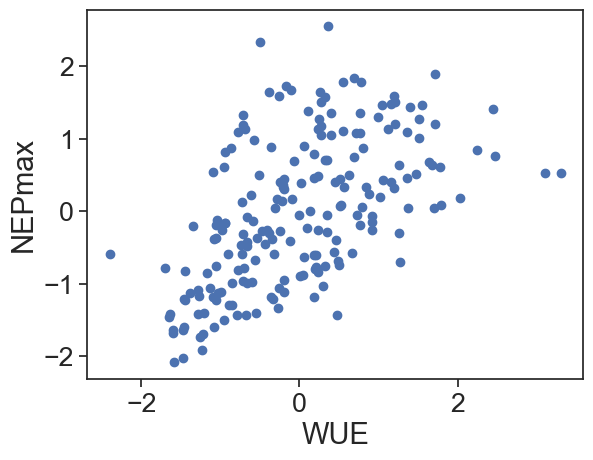

In [3]:
# step 2: B stores the features of each data point
# first, remove nan values in B
B = df[['WUE','NEPmax']].dropna().values
print(B.shape)
# then, normalize the data matrix B by subtracting the mean of each column (m0)
# and divided by the standard deviation of each column (std0)

B = (B-np.mean(B,axis=0))/np.std(B,axis=0)
plt.scatter(B[:,0],B[:,1])
plt.xlabel('WUE')
plt.ylabel('NEPmax')

[[ 0.11052993  0.04634514]
 [-0.08584339 -0.01400945]
 [-0.02763456 -0.0415662 ]]
Current label [1 0 0]
[[2.32724908 2.86442978 2.81580896]
 [2.66039195 3.3190418  3.21658699]
 [1.4426554  1.13569872 1.27486601]]
correct id for the 1st point: 0
correct id for the first three points: [0 0 1]
[0 0 1 1 2 1 1 1 1 1 1 2 1 1 0 1 1 0 2 0 1 0 0 1 0 0 0 1 0 2 0 0 1 1 2 2 2
 2 2 1 0 2 2 1 2 2 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 2 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 2 1 1 1 1 0 1 0 1 2 0 0 0 0 0 0 1 1 0 2 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 1 1 0 0 1 2 2 0 1 1 2 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 2 1 0 0 1 1 0 0 0 2 1 2 2 0 0 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1]


Text(0, 0.5, 'NEPmax')

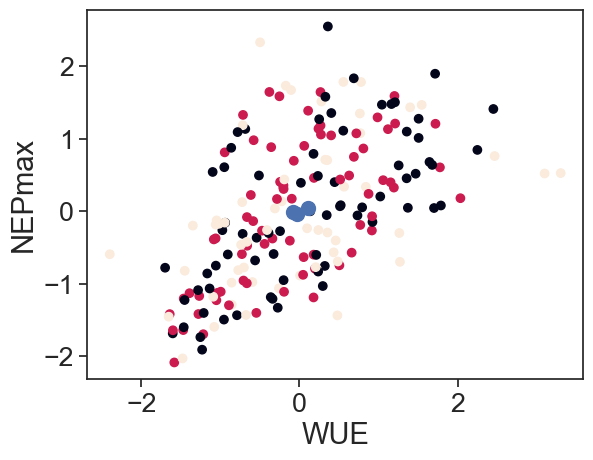

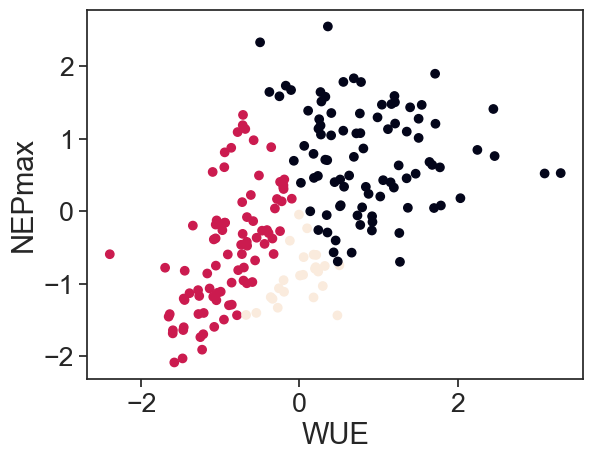

In [4]:
# Bonus step: write your own K-means algorithm:
from numpy.random import randint, seed
seed(1)

n, p = B.shape[0], B.shape[1]
K = 3
# Randomly assign cluster id
cid = randint(0,K,n)

centroid = np.zeros([K,p])
for i in range(K):
#     centroid[i,0] = np.mean(B[cid==i,0])
#     centroid[i,1] = np.mean(B[cid==i,1])
    centroid[i,:] = np.mean(B[cid==i,:],axis=0)
print(centroid)
plt.figure()
plt.scatter(B[:,0],B[:,1],c=cid)
plt.scatter(centroid[:,0],centroid[:,1],s=100)
plt.xlabel('WUE')
plt.ylabel('NEPmax')
#Distance of the 11th point to the 2nd centroid
# print(np.sum((B[10,:]-centroid[1,:])**2))
# print((B[10,0]-centroid[1,0])**2+(B[10,1]-centroid[1,1])**2)

#Distance of all points to the 2nd centroid
# distance_2 = np.sum((B-centroid[2,:])**2,axis=1)
# print(distance_K[:5])

distances = np.zeros([n,K])
for i in range(K):
    distances[:,i] = np.sum((B-centroid[i,:])**2,axis=1)

print('Current label',cid[:3])
print(distances[:3,:])

print('correct id for the 1st point:',np.argmin(distances[1,:]))
print('correct id for the first three points:',np.argmin(distances[:3,:], axis=1))
cid_updated = np.argmin(distances, axis=1)
print(cid_updated)

plt.figure()
plt.scatter(B[:,0],B[:,1],c=cid_updated)
plt.xlabel('WUE')
plt.ylabel('NEPmax')

0
1
2
3
4
5
6
7
8
9
converged.
10
converged.
11
converged.
12
converged.
13
converged.
14
converged.
15
converged.
16
converged.
17
converged.
18
converged.
19
converged.
20
converged.
21
converged.
22
converged.
23
converged.
24
converged.
25
converged.
26
converged.
27
converged.
28
converged.
29
converged.


Text(0, 0.5, 'NEPmax')

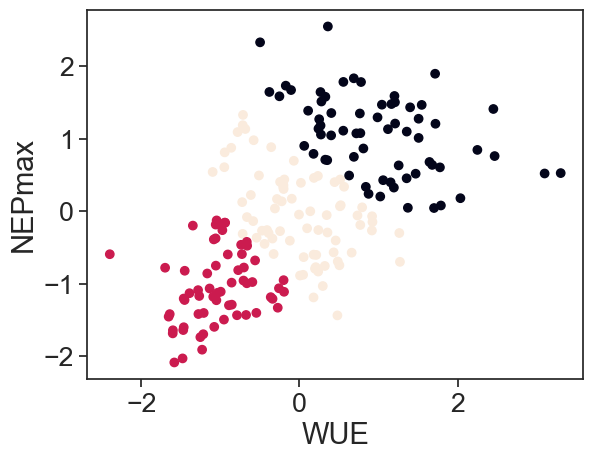

In [5]:
def update_cid(B,K,cid):
    n, p = B.shape[0], B.shape[1]
    centroid = np.zeros([K,p])
    distances = np.zeros([n,K])
    for i in range(K):
        centroid[i,:] = np.mean(B[cid==i,:],axis=0)
        distances[:,i] = np.sum((B-centroid[i,:])**2,axis=1)
    cid_updated = np.argmin(distances,axis=1)
    if sum(cid != cid_updated)==0:
        print('converged.')
    return cid_updated

for i in range(30):
    print(i)
    if i==0:
        cid_upated = update_cid(B,K,cid)
    else:
        cid_updated = update_cid(B,K,cid_updated)
    
plt.figure()
plt.scatter(B[:,0],B[:,1],c=cid_updated)
plt.xlabel('WUE')
plt.ylabel('NEPmax')

[2 2 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 2 2 0 0 0 0 1 2 1 0 0 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 0 1 1 1 2 0 2 2 2 1 0 0 2 0 0 2 1 0 1 1 1 0 2 0 2 2 2 2
 1 2 0 2 1 2 2 2 1 2 1 0 1 1 1 1 2 1 2 1 1 2 2 0 1 0 0 1 1 2 1 2 0 0 0 2 2
 2 2 0 0 1 0 0 0 2 0 0 2 2 0 0 2 1 0 0 0 2 0 1 1 2 1 1 1 1 1 1 1 0 2 2 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 2 2 1 1 0 0 2 1 0 1 1 2 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 2 1 0 0 2 0 0 1 2 2 1 1 0 0 0 1]
[[-0.03047152  0.7704649 ]
 [-0.71088804 -0.90079245]
 [ 1.35877644  0.69802632]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'NEPmax')

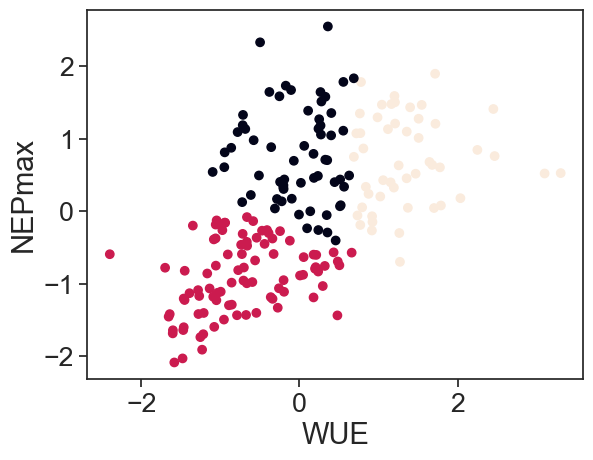

In [6]:
# step 3: use KMeans to classify the data to three clusters
# You may want to use the function KMeans()
from sklearn.cluster import KMeans

K = 3 # Set three clusters. 

k1 = KMeans(K).fit(B)


# How to interpret labels and cluster centers?

print(k1.labels_)
print(k1.cluster_centers_)

plt.figure()
plt.scatter(B[:,0],B[:,1],c=k1.labels_)
plt.xlabel('WUE')
plt.ylabel('NEPmax')


In [7]:
# step 5: Calculate within cluster variance (wcv) and across cluster variance (ccv)

# wcv = np.mean(np.var(B[cid_updated==2,:],axis=0))
# print(wcv)



wcv = [np.mean(np.var(B[cid_updated==k,:],axis=0)) for k in range(K)]
# wcv = [np.mean(np.var(B[cid==k,:],axis=0)) for k in range(K)]
print(wcv) # different from distance between pairs

wcv_avg = np.mean(wcv)

# calculate cross cluster variance
ccv = np.mean(np.var(k1.cluster_centers_,axis=0))

print(wcv_avg,ccv)


[0.45918467621322157, 0.21280321870809904, 0.3212645896498103]
0.3310841615237103 0.6683920857397697


In [8]:
# step 6: Wrap the above codes in a function kmeans_variance
# The input is data matrix B and the number of clusters we need K
# The outputs are within cluster variance and across cluster variance

def kmeans_variance(B,K):
    k1 = KMeans(K).fit(B)
    wcv = np.mean([np.mean(np.var(B[k1.labels_==k,:],axis=0)) 
                   for k in range(K)])
    ccv = np.mean(np.var(k1.cluster_centers_,axis=0))
    return wcv,ccv

wcv,ccv = kmeans_variance(B,K)
print(wcv,ccv)

0.32802748269762444 0.6499997166341369


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# Exercise 2: Use a random forest model to predict plant functional type 
# using solar radiation, air temperature, precipitation, canopy height, and maximum leaf area index
feature_list = ['SWin','Tair','P','Hc','LAImax']
target = ['PFT']

# Remove nan values
df1 = df[target+feature_list].dropna()

labels = np.array(df1[target])
features = np.array(df1[feature_list])

# Step 1: use the function train_test_split to holed 30% of data as testing set. Use the rest as training.
from sklearn.model_selection import train_test_split

# train_features, test_features, train_labels, test_labels = 

# Check the shapes of the training and testing sets
# print('Training Features Shape:',)
# print('Training Labels Shape:', )
# print('Testing Features Shape:', )
# print('Testing Labels Shape:',)

In [10]:
# Step 2: Use the RandomForestClassifier in sklearn to fit a random forest model, named rf, using the training set
from sklearn.ensemble import RandomForestClassifier

# rf = 

# Step 3: Predict the PFT in the test set and compare with the true value by pringting both lists out.


# predictions = 

# print(test_labels)
# print(predictions)




In [11]:
# Step 4: Evaluate the accuracy using the functions: accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
# acc = 
# print(acc)

# cm =  
# print(cm)




importances = rf.feature_importances_
print(importances)

plt.bar(feature_list,importances)

NameError: name 'rf' is not defined

In [ ]:
# Step 5: Visualize the relative importance of features using a bar plot

# importances = rf.feature_importances_

# plt.figure()
# plt.bar()
